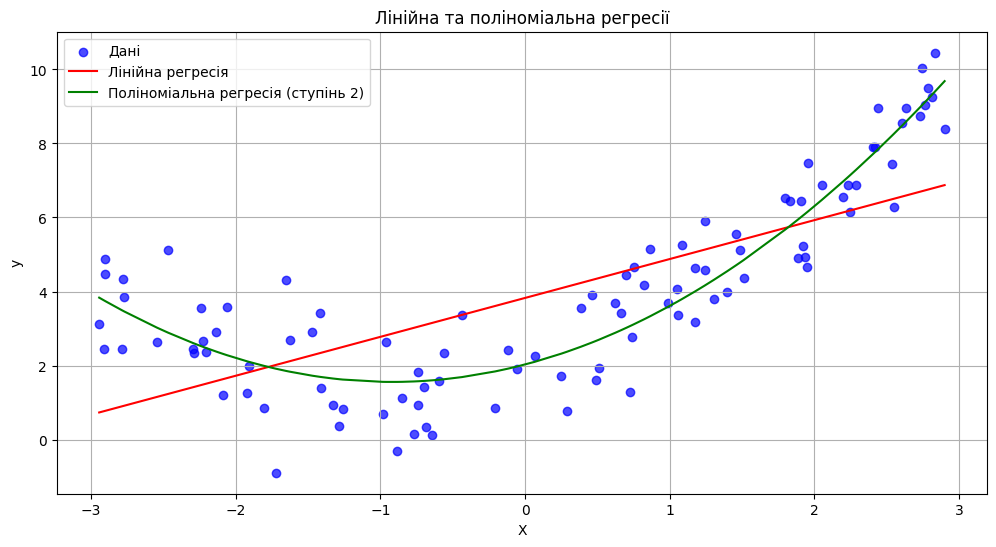

Лінійна регресія:
Коефіцієнт: [[1.05084774]]
Перетин: [3.82737714]

Поліноміальна регресія:
Коефіцієнти: [[1.02565297 0.55643611]]
Перетин: [2.03053934]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []

    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)

        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")




# Генерація випадкових даних
m = 100
X = 6 * np.random.rand(m, 1) - 3  # значення X в межах від -3 до 3
y = 0.6 * X ** 2 + X + 2 + np.random.randn(m, 1)  # y = 0.6 * X^2 + X + 2 + випадковий шум

# Лінійна регресія
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
y_pred_linear = linear_regressor.predict(X)

# Поліноміальна регресія
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y)
y_pred_poly = poly_regressor.predict(X_poly)

# Візуалізація
plt.figure(figsize=(12, 6))

# Вихідні дані
plt.scatter(X, y, color="blue", label="Дані", alpha=0.7)

# Лінійна регресія
plt.plot(np.sort(X, axis=0).ravel(), y_pred_linear[np.argsort(X, axis=0).ravel()].ravel(),
         color="red", label="Лінійна регресія")

# Поліноміальна регресія
plt.plot(np.sort(X, axis=0).ravel(), y_pred_poly[np.argsort(X, axis=0).ravel()].ravel(),
         color="green", label="Поліноміальна регресія (ступінь 2)")

plt.title("Лінійна та поліноміальна регресії")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# Коэффициенты регрессионных моделей
print("Лінійна регресія:")
print(f"Коефіцієнт: {linear_regressor.coef_}")
print(f"Перетин: {linear_regressor.intercept_}")

print("\nПоліноміальна регресія:")
print(f"Коефіцієнти: {poly_regressor.coef_}")
print(f"Перетин: {poly_regressor.intercept_}")


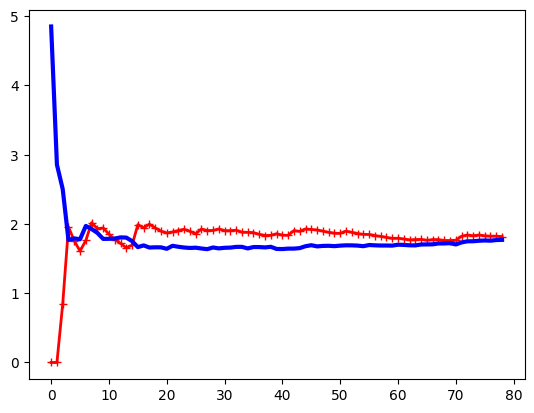

In [3]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

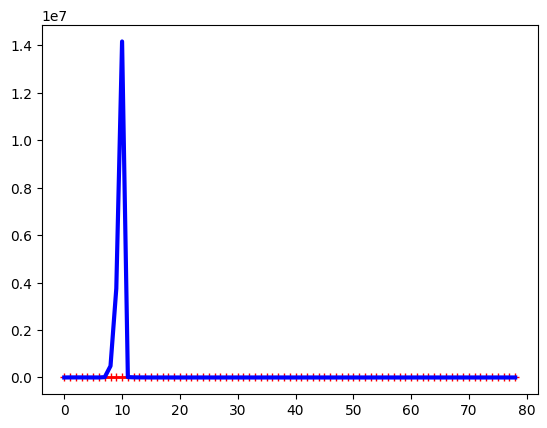

In [7]:
polynomial_regression = Pipeline([
    ("poly_features",
     PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

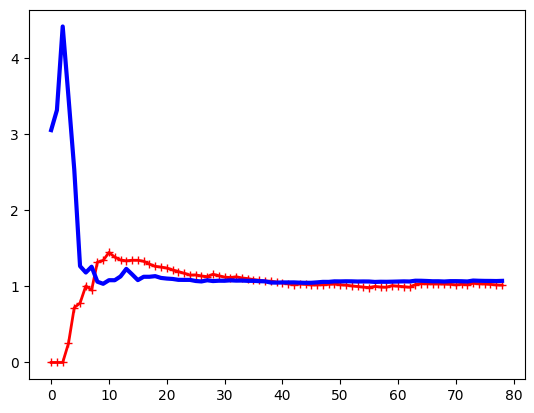

In [9]:
polynomial_regression_2 = Pipeline([
    ("poly_features",
     PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression_2, X, y)